In [1]:
"""
TMRW.FINANCE

Created on Mon Apr 15 22:44:02 2024

@author: Mark Daniel Balle Brezina Johansson
"""
import yfinance as yf
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

from datetime import datetime, date, timedelta, timezone
import sqlalchemy as sa

from scipy.stats import norm
from scipy.stats import linregress
from scipy import integrate
from statsmodels.tsa.stattools import adfuller
from hmmlearn.hmm import GaussianHMM

import TMRW.DATA as td
import TMRW.MATH as tm

In [30]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  1 23:23:08 2023

@author: Markb

    Created on 09-Apr-2022
    Authors: Kiril Zelenkovski, Petar Jolakoski, Pece Trajanovski

    Subordinator for calculation of CTRWs (O-U process)

"""

## This is an implementation of a simple integrator for a generic
# jump-diffusion process. This includes for a Euler─Mayurama and a Milstein
# integration scheme. To use the Milstein scheme the derivative of the diffusion
# function needs to be given. Created by Leonardo Rydin Gorjão and Pedro G. Lind




import pandas as pd
from IPython.display import Markdown, display
import numpy as np


class SSP:
    """
    The SSP class of stochastic processes
    """
    def __init__(self, runs = 1, timeframe = 30):
        """
        The SSP class takes in number of runs and timeframe to store it for later use with stochastic processes
        """
        self.runs = runs
        self.timeframe = timeframe

    #Random walk
    
    def RW(self, _print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        no additional information is needed and the output will be a dataframe with
        number of runs times timeframe
        
        Abbreviations
        -------------
        The function is synonomous with RandomWalk, randomwalk, Random_Walk, R_W, r_w, rw and RW
        
        Parameters
        ----------
        _print_: (True/False): True prints the mathematical description of the formula used in the simulation
        
        Returns
        -------
        A numpy array of simulated paths for the random walk process
        
        Examples
        --------
        >>> random_walk(False)
        array([[ 0], [ 1], [ 2]],[[ 0], [ -1], [ 0]])
        
        >>> random_walk(True)
        This stochastic process is the discrete random walk, with the equation:  𝑥𝑡=𝑥𝑡−1+𝜖𝑡, where 𝜖𝑡 is the Rademacher distribution at time t:  𝑓(𝑘)={1/21/2𝑖𝑓𝑘=1𝑖𝑓𝑘=−1
        array([[ 0], [ 1], [ 2]],[[ 0], [ -1], [ 0]])
        
        """
        if _print_ == True:
            equation = r'$x_t = x_{t-1} + \epsilon_t$'
            eq = r'$ f(k)=\left\{\begin{matrix}1/2 & if \;\;\; k=1 \\1/2 & if \;\;\; k=-1 \\\end{matrix}\right.$'
            display(Markdown((f'This stochastic process is the discrete random walk, with the equation: {equation}, where $\epsilon_t$ is the Rademacher distribution at time t: {eq}')))

        all_walks = []
        for i in range(self.runs) :
            random_walk = [0]
            for t in range(self.timeframe) :
                step = random_walk[-1]
                probability = np.random.randint(0,2)
                if probability == 0:
                    step = step + 1
                elif probability == 1:
                    step = step - 1
                random_walk.append(step)
            all_walks.append(random_walk)
        dataframe_allwalks = np.array(all_walks)
        walks = pd.DataFrame(dataframe_allwalks)
        return(walks)
    
    def randomwalk(self, _print_ = False):
        """
        This is a synonumous function to random_walk
        """
        return self.RW(_print_)
    
    def RandomWalk(self, _print_ = False):
        """
        This is a synonumous function to random_walk
        """
        return self.RW(_print_)
    
    def Random_Walk(self, _print_ = False):
        """
        This is a synonumous function to random_walk
        """
        return self.RW(_print_)
    
    def R_W(self, _print_ = False):
        """
        This is a synonumous function to random_walk
        """
        return self.RW(_print_)  
    
    def r_w(self, _print_ = False):
        """
        This is a synonumous function to random_walk
        """
        return self.RW(_print_)
    
    def rw(self, _print_ = False):
        """
        This is a synonumous function to random_walk
        """
        return self.RW(_print_)
    
    def random_walk(self, _print_ = False):
        """
        This is a synonumous function to random_walk
        """
        return self.RW(_print_)  
    
    #Wiener process 
    
    def WP(self, _print_ = False):
        """
       From the SSP class, the number of runs and the timeframe has been indicated.
       By adding True or _print_ = True in the input, the user will have a printout 
       of the mathematical description for the process. For this stochastic process
       no additional information is needed and the output will be a dataframe with
       number of runs times timeframe
       
       Abbreviations
       -------------
       The function is synonomous with WienerProcess, wienerprocess, Wiener_Process, W_P, w_p, wp and WP.
       
       Parameters
       ----------
       _print_: (True/False): True prints the mathematical description of the formula used in the simulation
       
       Returns
       -------
       A numpy array of simulated paths for the simple wiener process
       
       Examples
       --------
       >>> wiener_process(False)
       array([[ 0], [ 1], [ 2]],[[ 0], [ -1], [ 0]])
       
       >>> wiener_process(True)
       This stochastic process is the discrete wiener process, with the equation: 𝑥𝑡=𝑥𝑡−1+√dt⋅𝑁𝑑𝑖𝑠𝑡, where 𝑁𝑑𝑖𝑠𝑡 is the standard normal distribution and √d𝑡 is the squareroot of the time difference between steps
       array([[ 0], [ 1], [ 2]],[[ 0], [ -1], [ 0]])
       
        """
        if _print_ == True:
            equation = r'$x_t = x_{t-1} + \sqrt{dt} \cdot N_{dist}$'
            display(Markdown((f'This stochastic process is the discrete wiener process, with the equation: {equation}, where' +r'${N_{dist}}$'+' is the standard normal distribution and $\sqrt dt$ is the squareroot of the time difference between steps')))
       
        all_walks = []
        for j in range(self.runs):
            walk = np.zeros((self.timeframe))
            walk[0] = 1
            for i in range(1, self.timeframe):
                yi = np.random.normal()
                walk[i] = walk[i-1]+(yi)*np.sqrt(1/self.timeframe)
            all_walks.append(walk)
        dataframe_allwalks = np.array(all_walks)
        walks = pd.DataFrame(dataframe_allwalks)

        return(walks)
   
    def wp(self, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.WP(_print_)

    def wiener_process(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_) 

    def w_p(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_) 

    def W_P(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_) 

    def Wiener_Process(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_) 

    def wienerprocess(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_)

    def WienerProcess(self, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.WP(_print_)
    
    
    #Brownian motion
    
    def BM(self, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.WP(_print_)
    
    def bm(self, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.WP(_print_)
    
    def B_M(self, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.WP(_print_)
    
    def b_m(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_) 
   
    def brownianmotion(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_) 
   
    def BrownianMotion(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_) 
   
    def Brownian_Motion(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_) 
   
    def brownian_motion(self, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.WP(_print_) 
   
    
    #Arithmetic brownian motion
    def ABM(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        no additional information is needed and the output will be a dataframe with
        number of runs times timeframe
        
        Abbreviations
        -------------
        The function is synonomous with WienerProcess, wienerprocess, Wiener_Process, W_P, w_p, wp and WP.
        
        Parameters
        ----------
        _print_: (True/False): True prints the mathematical description of the formula used in the simulation
        
        Returns
        -------
        A numpy array of simulated paths for the simple wiener process
        
        Examples
        --------
        >>> wiener_process(False)
        array([[ 0], [ 1], [ 2]],[[ 0], [ -1], [ 0]])
        
        >>> wiener_process(True)
        This stochastic process is the discrete wiener process, with the equation: 𝑥𝑡=𝑥𝑡−1+√dt⋅𝑁𝑑𝑖𝑠𝑡, where 𝑁𝑑𝑖𝑠𝑡 is the standard normal distribution and √d𝑡 is the squareroot of the time difference between steps
        array([[ 0], [ 1], [ 2]],[[ 0], [ -1], [ 0]])
        
        """
        if _print_ == True:
            equation = r'$x_t = x_{t-1} + \mu \cdot dt + \sigma \cdot \sqrt{dt} \cdot N_{dist}$'
            display(Markdown((f'This stochastic process is the discrete wiener process, with the equation: {equation}, where' +r'${N_{dist}}$'+' is the standard normal distribution and $\sqrt dt$ is the squareroot of the time difference between steps')))
        
        dt = 1/self.timeframe
        dW = np.sqrt(dt)*np.random.randn(self.runs, self.timeframe)
        dS = mu*dt + sigma*dW
        
        dS = np.insert(dS, 0, 1, axis=1)
        walks = np.cumsum(dS, axis=1)
        walks = pd.DataFrame(walks)
        return(walks)
    
    def abm(self, mu = 1, sigma = 0.25, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.ABM(mu, sigma, _print_) 
   
    def a_b_m(self, mu = 1, sigma = 0.25, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.ABM(mu, sigma, _print_) 
   
    def A_B_M(self, mu = 1, sigma = 0.25, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.ABM(mu, sigma, _print_)  
    
    def ArithmeticBrownianMotion(self, mu = 1, sigma = 0.25, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.ABM(mu, sigma, _print_) 
   
    def arithmeticbrownianmotion(self, mu = 1, sigma = 0.25, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.ABM(mu, sigma, _print_) 
   
    def arithmetic_brownian_motion(self, mu = 1, sigma = 0.25, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.ABM(mu, sigma, _print_) 
   
    def Arithmetic_Brownian_Motion(self, mu = 1, sigma = 0.25, _print_ = False):
       """
       This is a synonumous function to wiener_process
       """
       return self.ABM(mu, sigma, _print_) 

    #Arithmetic wiener process

    def AWP(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.ABM(mu, sigma, _print_)
    
    def awp(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.ABM(mu, sigma, _print_)
    
    def A_W_P(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.ABM(mu, sigma, _print_)
    
    def a_w_p(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.ABM(mu, sigma, _print_)
    
    def arithmetic_wiener_process(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.ABM(mu, sigma, _print_)
    
    def arithmeticwienerprocess(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.ABM(mu, sigma, _print_)
    
    def Arithmetic_Wiener_Process(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.ABM(mu, sigma, _print_)
    
    def ArithmeticWienerProcess(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.ABM(mu, sigma, _print_)
    
    
    
    
    #Exponential brownian motion
    def EBM(self, mu = 1, sigma=0.25, _print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        x0 is needed as additional information and the output will be a dataframe 
        with number of runs times timeframe
        :param _print_: must be True or False
        :param x0: Is set to be 1, unless changed by the user.
        :param sigma: is set to be 0.25, unless changed by the user.
        """
        
        if _print_ == True:
            equation = r'$x_t = x_{t-1} \cdot e^{\mu-0.5\cdot \sigma^{2}} \cdot dt + \sigma \cdot \sqrt{dt} \cdot N_{dist}$'
            display(Markdown((f'This stochastic process is the discrete financial wiener process with drift, with the equation: {equation} where' + r'${N_{dist}}$'+' is the standard normal distribution and $e^{r-0.5\cdot \sigma^{2}}$ is the drift w.r.t the risk-free rate and the standard deviation')))
            
        dt = 1/self.timeframe
        walks = pd.DataFrame(np.zeros((self.runs, self.timeframe)))
        walks.iloc[:,0] = 1
        for i in range(len(walks)):
            for t in range(1, self.timeframe):
                walks.iloc[i,t] = walks.iloc[i, t - 1] * np.exp((mu - 0.5*sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(1, 1))

        return(walks) 
    
    def ebm(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def e_b_m(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def E_B_M(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def Exponential_Brownian_Motion(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def exponential_brownian_motion(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def ExponentialBrownianMotion(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def exponentialbrownianmotion(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    #exponential wiener process
    
    def EWP(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def ewp(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def e_w_p(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def E_W_P(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def Exponential_Wiener_Process(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def exponential_wiener_process(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def ExponentialWienerProcess(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def exponentialwienerprocess(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    
    #geometric brownian motion
    
    def GBM(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def gbm(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def g_b_m(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def G_B_M(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def Geometric_Brownian_Motion(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def geometric_brownian_motion(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def GeometricBrownianMotion(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def geometricbrownianmotion(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)

    
    
    #geometric wiener process
    
    def GWP(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def gwp(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def g_w_p(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def G_W_P(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def Geometric_Wiener_Process(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def geometric_wiener_process(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def GeometricWienerProcess(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    def geometricwienerprocess(self, mu = 1, sigma = 0.25, _print_ = False):
        """
        This is a synonumous function to wiener_process
        """
        return self.EBM(mu, sigma, _print_)
    
    
   
    # brownian bridge
    
    def Brownian_Bridge(self, alpha, beta, sigma, _print_ = False):
        """dS = ((b-X)/(T-t))*dt + sigma*dW
        Model can support useful variance reduction techniques for pricing derivative contracts using Monte-Carlo simulation, 
        such as sampling. Also used in scenario generation.
        Requires numpy, pandas and plotly.express
        alpha = start
        beta = end
        sigma = spread
        Returns the paths, S, for the Brownian Bridge using the Euler-Maruyama method"""
        
        if _print_ == True:
            equation = r'$x_{t+1} = x_{t} + \frac{(\beta-x_t)}{(T-t+1)} + \sigma \cdot dW(t) \sqrt{dt} \cdot N_{dist}$'
            display(Markdown((f'This stochastic process is the discrete financial wiener process with drift, with the equation: {equation} where' + r'${N_{dist}}$'+' is the standard normal distribution and $e^{r-0.5\cdot \sigma^{2}}$ is the drift w.r.t the risk-free rate and the standard deviation')))
        
        dt = 1/self.timeframe
        dW = np.sqrt(dt)*np.random.randn(self.timeframe, self.runs)
        S = np.concatenate((alpha*np.ones((1, self.runs)),np.zeros((self.timeframe-1, self.runs)), beta*np.ones((1, self.runs))), axis=0)
    
        for i in range(0, self.timeframe-1):
            S[i+1,:] = S[i,:] + (beta-S[i,:])/(self.timeframe-i+1) +sigma*dW[i,:]
    
        return S
       
    

2.5258732802076196


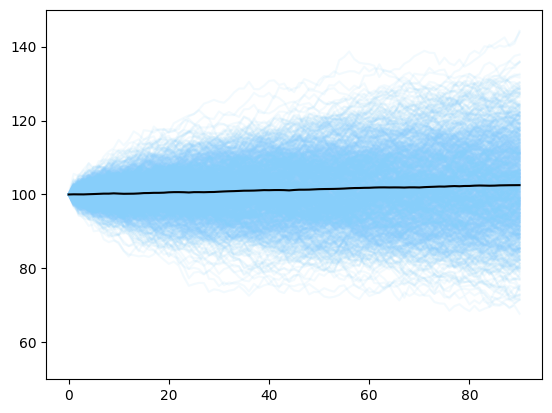

In [33]:
GBM1 = 100 * (1 + SSP(1000, 90).ABM(mu = 0.028, sigma = 0.12)-1)

mean_path1 = []
for i in range(len(GBM1.columns)):
    mean_path1.append(np.mean(GBM1.iloc[:,i]))


for i in range(len(GBM1)):
    plt.plot(GBM1.columns, GBM1.iloc[i,:], color = "lightskyblue", alpha = 0.1)
plt.plot(GBM1.columns, mean_path1, color = "k", alpha = 1.0)
plt.ylim(50,150)
plt.savefig("Brownian1")

print(mean_path1[90] - mean_path1[0])

2.4665161005783176


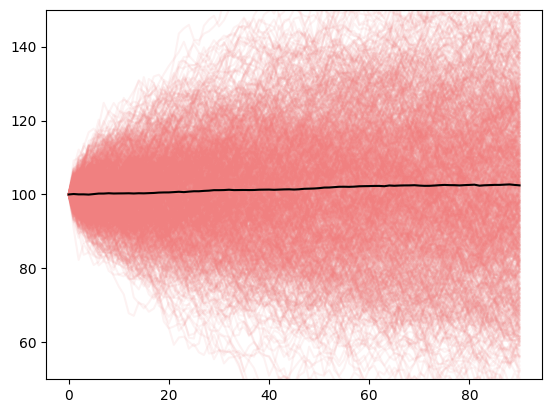

In [34]:
GBM2 = 100 * (1 + SSP(1000, 90).ABM(mu = 0.028, sigma = 0.25)-1)
mean_path2 = []
for i in range(len(GBM2.columns)):
    mean_path2.append(np.mean(GBM2.iloc[:,i]))


for i in range(len(GBM2)):
    plt.plot(GBM2.columns, GBM2.iloc[i,:], color = "lightcoral", alpha = 0.1)
plt.plot(GBM2.columns, mean_path2, color = "k", alpha = 1.0)
plt.ylim(50,150)
plt.savefig("Brownian2")

print(mean_path2[90] - mean_path2[0])

## Slopes, returns and accelerations

In [25]:
lst = [[1,1],[2,1.3],[3,1.2],[4,2],[5,0.3],[6,2.1],[7,1.3],[8,2.3],[9,2.55],[10,2.61],[11,2.89],[12,3.01],[13,3.12],[14,3.52],[15,4]]
lst = pd.DataFrame(lst)

In [26]:
###############################################################################
#                        Slopes, returns and accelerations
#                        For calculating import 
#                        intra and inter day differences
###############################################################################

def slope(array):
    """
    """
    y = np.array(array)
    x = np.arange(len(y))
    slopes, intercept, r_value, p_value, std_err = linregress(x,y)
    return(slopes)

def returns(x, logs = False):
    """
    """
    if type(x) == list: # if you've entered a list
        _return = np.zeros(len(x))
        for i in range(len(x)):
            _return[i] = ((x[i]/x[i-1])-1)
    elif type(x) == pd.DataFrame: # if you've entered a dataframe
        _return = x.pct_change().dropna()   
    else: # if you've entered neither a list or a dataframe
        _return = x.pct_change().dropna()
    
    # if you want log returns
    if logs == True:
        _return = np.log(abs(_return))
    
    df = pd.DataFrame(data=_return, dtype=np.float64)
    df.columns = ["returns"]
    return(df)

def acceleration(x, logs = False):
    """
    """
    x = returns(x, logs)
    if type(x) == list:  # if you've entered a list
        acc = np.zeros(len(x))
        for i in range(len(x)):
            acc[i] = ((x[i]/x[i-1])-1)
    elif type(x) == pd.DataFrame: # if you've entered a dataframe
        acc = x.pct_change().dropna() 
    else: # if you've entered neither a list or a dataframe
        acc = x.pct_change().dropna()
        
     # if you want log acceleration  
    if logs == True:
        acc = np.log(abs(acc))
    
    df = pd.DataFrame(data=acc, dtype=np.float64)
    df.columns = ["acceleration"]
    return(df)

## Moving averages and standard deviations

In [106]:
###############################################################################
#                        Moving averages and stds
#                        volume weighted averages and stds
#                        bollinger bands?
###############################################################################

# Time-weighted Moving Average
def twa(data, window = 20, typ = "sma", x = True):
    """
    time-weighted moving average
    """
    if typ == "sma": # simple moving average
        if len(data) < window+1:
            raise ValueError("not enough data")
            
        if x == True:
            
            df = []
            for i in range(len(data)):
                if i < window:
                    df.append(data[i])
                else:
                    df.append(np.mean(data[i-window:i]))

            df = pd.DataFrame(df, index = data.index)
            df = df.iloc[0:len(df), 0]
            
            return(df)
    
        elif x == False:

            df = []
            for i in range(len(data)):

                ma = np.zeros(window)

                for j in range(1,window):

                    if i < window:
                        ma[j] = data[j]


                    if i >= window:

                        ma[j] = np.mean(data[i-j:i])

                df.append(ma)

            df = pd.DataFrame(df, index = data.index)
            df = df.iloc[0:len(df), 1:len(df.columns)]
            
            return(df)
    
    elif typ == "ema": # exponential moving average

        df = pd.DataFrame(index=data.index, dtype=np.float64)
        df.loc[:,0] = data.ewm(span=window, min_periods=0, adjust=True, ignore_na=False).mean().values.flatten() # ????
    
        return(df)
      
#Time-Price Moving STD
def twstd(data, window = 20, x = True):
    """
    time-weighted moving standard deviation of prices
    also called volatility
    """
    if len(data) < window+1:
        raise ValueError("not enough data")

    if x == True:
        
        df = []
        for i in range(len(data)):
            if i < window:
                df.append(data[i])
            else:
                df.append(np.std(data[i-window:i]))

        df = pd.DataFrame(df, index = data.index)
        df = df.iloc[0:len(df), 0]
        
        return(df)
        
    elif x == False:  
        
        df = []
        for i in range(len(data)):

            mstd = np.zeros(window)

            for j in range(1,window):

                if i >= j:

                    mstd[j] = np.std(data[i-j:i])

            df.append(mstd)

        df = pd.DataFrame(df, index = data.index)
        df = df.iloc[0:len(df), 1:len(df.columns)]
    
        return(df)
   
    
# Volume-weighted Moving Average
def vwa(data, weights, window = 20):
    """
    volume-weighted moving average
    """
    
    vwa = np.zeros(window)
    vwa = list(vwa)
    for i in range(len(data)):
        
        if i < window:
            
            vwa[i] = data[i]
            
        else:
    
            v_sum = sum(weights[i-window:i])
            v_w_avg = 0
            for j in range(window):
                v_w_avg = v_w_avg + data[i-j] * (weights[i-j] / v_sum)

            vwa.append(v_w_avg)
    
    df = pd.DataFrame(vwa)
    return(df)

#Volume-weighted Moving STD
def vwstd(data, weights, window = 20):
    """
    volume-weighted moving standard deviations
    """
    
    v_w_avg = 0
    vws = np.zeros(window)
    vws = list(vws)
    for i in range(window, len(data)):
    
        v_sum = sum(weights[i-window:i])
        v_w_std = 0
        for j in range(window):
            v_w_std = v_w_std + ((data[i-j] - np.mean(data[i-window:i]))**2 )* (weights[i-j] / v_sum)

        vws.append(np.sqrt(v_w_std))
    
    df = pd.DataFrame(vws)
    return(df)


## Technical indicators

In [ ]:
###############################################################################
#                        Technical indicators
#                        RSI, Stochastic Oscillator
#
###############################################################################

def RSI(data, window = 20):
    """
    
    """
    delta = data.diff().dropna() # Close_now - Close_yesterday
    
    u = np.zeros(len(delta)) # make an array of 0s for the up returns
    u[delta > 0] = delta[delta > 0] # for all the days where delta is up, transfer them to U
    
    d = np.zeros(len(delta)) # make an array of 0s for the down returns   
    d[delta < 0] = -delta[delta < 0] # for all the days where delta is down, transfer them to D
    
    u[u.index[window-1]] = np.mean( u[:window] ) #first value is sum of avg gains
    u = u.drop(u.index[:(window-1)]) #drop the days before the window opens
    
    d[d.index[window-1]] = np.mean( d[:window] ) #first value is sum of avg losses
    d = d.drop(d.index[:(window-1)]) #drop the days before the window opens
    
    RS = pd.DataFrame.ewm(u, com=window-1, adjust=False).mean() / pd.DataFrame.ewm(d, com=window-1, adjust=False).mean() # EMA(up) / EMA(down)
     
    RSI_ = 100 - (100 / (1 + RS))
    return(RSI_)

def Fisher_RSI(data, window = 20):
    """
    inverse fisher transform on RSI = 0.1*(rsi-50)
    fisher rsi = (np.exp(2*rsi)-1) / (np.exp(2*rsi)+1)
    """
    
    RSI_ = 0.1 * (RSI(data, window) - 50)
    F_RSI = (np.exp(2*RSI_)-1) / (np.exp(2*RSI_)+1)
    return(F_RSI)

def bollinger_bands(data, window = 20, std = 2.5):
    """
    
    """
    mean_lst = np.zeros(len(data))
    std_lst = np.zeros(len(data))
    for i in range(0, window):
        mean_lst[i] = data[i]
        std_lst[i] = 0.05 * data[i]
    
    for i in range(window,len(data)):
        mean_lst[i] = np.mean(data[i-window:i])
        std_lst[i] = np.std(data[i-window:i])
        
    up = mean_lst + std * std_lst
    down = mean_lst - std * std_lst
    
    df = pd.DataFrame()
    df['Upper'] = up
    df['Lower'] = down
    return(df)


In [ ]:
def get_stochastic_oscillator(data, window = 20):
    
    price = []
    low = []
    high = []
    
    
    for i in range(len(df)):
        price.append(data[i])
        
        if i < window:
            low.append(data[i])
            high.append(data[i])
            
        elif i >= window:
            
            
        low = df.iloc[i]['close']
        high = df.iloc[i]['close']
        if i >= period:
            n = 0
            while n < period:
                if df.iloc[i-n]['close'] >= high:
                    high = df.iloc[i-n]['close']
                elif df.iloc[i-n]['close'] < low:
                    low = df.iloc[i-n]['close']
                n += 1
            df.at[i, 'best_low'] = low
            df.at[i, 'best_high'] = high
            df.at[i, 'fast_k'] = 100*((df.iloc[i]['close']-df.iloc[i]['best_low'])/(df.iloc[i]['best_high']-df.iloc[i]['best_low']))

    df['fast_d'] = df['fast_k'].rolling(3).mean().round(2)
    df['slow_k'] = df['fast_d']
    df['slow_d'] = df['slow_k'].rolling(3).mean().round(2)

    return df['slow_d']

In [ ]:
def calc_k_d(data, N=14, M=3):
    data['low_N'] = data['Low'].rolling(N).min()
    data['high_N'] = data['High'].rolling(N).max()
    data['K'] = 100 * (data['Close'] - data['low_N']) / \
        (data['high_N'] - data['low_N'])
    data['D'] = data['K'].rolling(M).mean()
    return data

In [ ]:


def MACD(x):
    """
    """
    x = x +1
    return(x)

def average_directional_index(x):
    """
    """
    x = x +1
    return(x)



def Parabolic_SAR(x):
    """
    parabolic stop and reverse.
    SAR = ta.SAR(dataframe)
    https://en.wikipedia.org/wiki/Parabolic_SAR
    https://en.wikipedia.org/wiki/Heikin-Ashi_chart
    """
    
    x = x+1
    return(x)


def CDLHAMMER(x):
    """
    Hammer = ta.CDLHAMMER(dataframe)
    """
    x = x + 1
    return(x)

def rising_star(x):
    """
    """
    x = x + 1
    return(x)



def supertrend(x):
    """
    """
    x = x +1
    return(x)

def money_flow_index(x):
    """
    """
    x = x +1
    return(x)


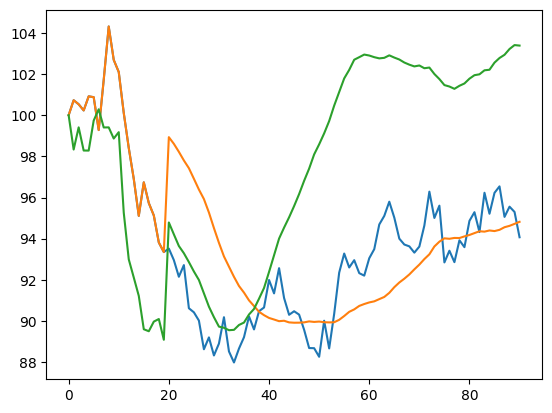

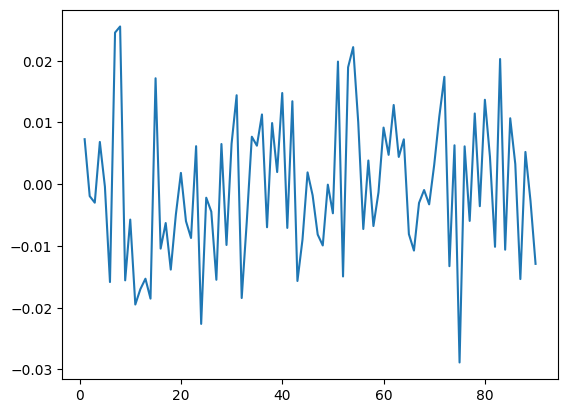

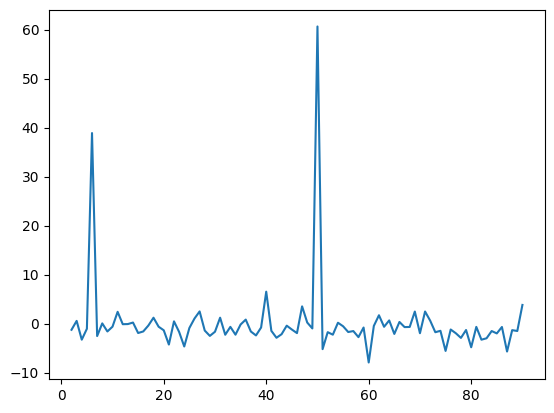

In [107]:
# value plot
plt.plot(GBM1.T.index, GBM1.T[2])
plt.plot(GBM1.T.index, twa(GBM1.T[2]))
plt.plot(GBM1.T.index, vwa(GBM1.T[1], GBM1.T[2]))
plt.show()

# returns plot
plt.plot(returns(GBM1.T[2]).index, returns(GBM1.T[2]).returns)
plt.show()

# acceleration plot
plt.plot(acceleration(GBM1.T[2]).index, acceleration(GBM1.T[2]).acceleration)
plt.show()

## Portfolio methods

In [ ]:
###############################################################################
#                        Portfolio level important functions
#                        VaR, CVaR, Drawdown, Annualized returns, etc.
#                        Not used for trading, but for profit considerations.
###############################################################################

def var(data, level=5):
    """
    """
    z = norm.ppf(level/100)
    return(-(data.mean() + z*data.std(ddof=0)))

def cvar(data, level=5):
    """
    """
    confidence_level = 1-(level/100)  # Set the desired confidence level
    sorted_prices = np.sort(data)
    num_samples = len(sorted_prices)
    cvar_index = int((1 - confidence_level) * num_samples)
    cvar = np.mean(sorted_prices[:cvar_index])
    return(cvar)

def drawdown(return_series):
    """
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Drawdown": drawdowns})

def sharpe(self,x):
    """
    """
    mu = x.mean()
    sigma = np.sqrt(x.var())
    return((mu-5) / sigma)

#def sortino(risk_free,degree_of_freedom,growth_rate,minimum):
    #v=np.sqrt(np.abs(scipy.integrate.quad(lambda g ((risk_freeg)**2)*scipy.stats.t.pdf(g, degree_of_freedom), risk_free, minimum)))
    #s=(growth_rate-risk_free)/v[0]

    #return s


## Statistical or quantitative indicators

In [ ]:
def UD_ind(data):
    """
    """
    result = pd.DataFrame()
    result['returns'] = data
    
    lst = ["","","",""]

    for i in range(4,len(data)):

        st = ""

        if data[i-3] < 0:
            st = "D"
        elif data[i-3] >= 0:
            st = "U"

        if data[i-2] < 0:
            st = st + "D"
        elif data[i-2] >= 0:
            st = st + "U"

        if data[i-1] < 0:
            st = st +"D"
        elif data[i-1] >= 0:
            st = st + "U"

        lst.append(st)

    result['UD3indicator'] = lst

    lst = ["", "", "", "", ""]

    for i in range(5,len(data)):

        st = ""

        if data.iloc[i-5] < 0:
            st = "D"
        elif data.iloc[i-5] >= 0:
            st = "U"

        if data.iloc[i-4] < 0:
            st = st + "D"
        elif data.iloc[i-4] >= 0:
            st = st + "U"

        if data.iloc[i-3] < 0:
            st = st +"D"
        elif data.iloc[i-3] >= 0:
            st = st + "U"

        if data.iloc[i-2] < 0:
            st = st +"D"
        elif data.iloc[i-2] >= 0:
            st = st +"U"

        if data.iloc[i-1] < 0:
            st = st + "D"
        elif data.iloc[i-1] >= 0:
            st = st + "U"

        lst.append(st)

    result['UD5indicator'] = lst
    
    return(result)

def trend_ind(data):
    """
    """
    assert data.columns[3] == "Close"
    assert data.columns[7] == "velocity"

    result = data.copy()
    Trend = [None] * len(result)
    for i in range(21, len(result)):
        Trend[i] = tm.mk_test(result['Close'][i-21:i], 'full', window = 21)[0]
    
    Trend2 = [None] * len(result)
    for i in range(21, len(result)):
        t_ind = np.mean(result['velocity'][i-21:i]) * 100
        if t_ind < -0.5:
            Trend2[i] = "decreasing"
        elif t_ind > 0.5:
            Trend2[i] = "increasing"
        else:
            Trend2[i] = "no trend"     
    result = pd.DataFrame([Trend, Trend2]).T
    return(result)

def hidden_states(data):
    data = data.dropna()
    data.replace([np.inf, -np.inf, np.nan], 1, inplace=True)

    close = np.array(data.iloc[1:,3])
    vel = np.array(data.iloc[1:,7])
    acc = np.array(data.iloc[1:,8])
    vol = np.array(data.iloc[1:,4])
    vol_vel = np.array(data.iloc[1:,9])
    vol_acc = np.array(data.iloc[1:,10])


    RSI = np.array(data.iloc[1:,11])
    MA3 = np.array(data.iloc[1:,13])
    STD3 = np.array(data.iloc[1:,14])
    MA5 = np.array(data.iloc[1:,18])
    STD5 = np.array(data.iloc[1:,19])
    MA10 = np.array(data.iloc[1:,23])
    STD10 = np.array(data.iloc[1:,24])
    MA60 = np.array(data.iloc[1:,38])
    STD60 = np.array(data.iloc[1:,39])


    X = np.column_stack([close, vel, acc, vol, vol_vel, vol_acc, RSI, MA3, STD3, MA5, STD5, MA10, STD10, MA60, STD60])
    model = GaussianHMM(n_components=6, covariance_type="diag", n_iter=10000, random_state = 123).fit(X)
    hidden_states = model.predict(X)
    data = data.iloc[1:,:]
    data['States'] = hidden_states
    return(data)

In [ ]:
###############################################################################
#                        statistical and quantitative indicators
#                        Backtest, Up-down indicator, trend indicator etc.
#                        These need a series of updates
###############################################################################

# unsure of functionality
def backtest(x, window = 21):
    weights = x.shift(1).rolling(window= window).std().dropna() / np.mean(x)
    return(x * weights.shift(1)).sum()  
    